In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [85]:
dist = {}
abits = 4

sample_num = 10000
dist["gaussian"] = np.random.normal(size=sample_num)
dist["uniform"] = np.random.uniform(low=-1, high=1, size=sample_num)
dist["laplace"] = np.random.laplace(size=sample_num)
dist["logistic"] = np.random.logistic(loc=0.0, scale=1.0, size=sample_num)
dist["triangular"] = np.random.triangular(-2, 0, 2, size=sample_num)
dist["vonmises"] = np.random.vonmises(0, 4, size=sample_num)


gaussian (0.8006264541698398, 1.0052452396646725)
max index = 6427
opt scale is 0.32135, cheet scale is 1.4971714692976006
opt MSE is 0.010400468337653734, cheet MSE is 0.18648208509647213
uniform (0.5015912573202888, 0.5781064691460746)
max index = 2351
opt scale is 0.11755, cheet scale is 0.7523868859804331
opt MSE is 0.0011550194567705359, cheet MSE is 0.040358211060026634
laplace (1.0065662464523732, 1.4299849441399117)
max index = 13185
opt scale is 0.65925, cheet scale is 2.335233691769506
opt MSE is 0.047572345487457986, cheet MSE is 0.39264766557453284
logistic (1.369231386141802, 1.8029953024553562)
max index = 14475
opt scale is 0.72375, cheet scale is 2.848001283174948
opt MSE is 0.05938283040241968, cheet MSE is 0.6617652073892762
triangular (0.6714649822768998, 0.8218588466952493)
max index = 4279
opt scale is 0.21395, cheet scale is 1.1683490691618057
opt MSE is 0.004000893092684815, cheet MSE is 0.11265783518069272
vonmises (0.4223652748958276, 0.5403087234095829)
max in

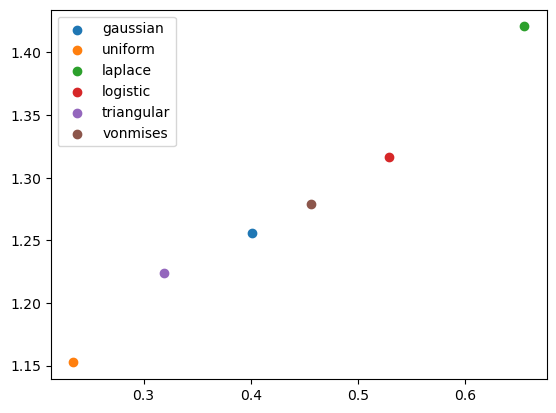

In [86]:
def quantize(x, scale, bits):
    num_bins = 2 ** bits
    upper = 2 ** (bits - 1)
    lower = -2 ** (bits - 1)

    x = x / scale
    x = np.clip(x, lower, upper)
    x = np.around(x)
    x = x * scale
    return x

def Var_Mean(x):
    mean = np.mean(np.abs(x))
    std = np.sqrt(np.mean(np.square(x)))
    return mean, std

def MSE(x, y):
    return np.mean(np.square(x - y))

cheet = {
    "gaussian":1.87,
    "uniform" : 1.5,
    "laplace" : 2.32,
    "logistic": 2.08, 
    "triangular":1.74,
    "vonmises":1.96, 
}

c1, c2 = np.array([]), np.array([])
plt_mean, plt_std = np.array([]), np.array([])
for name in dist.keys():
    print(name, Var_Mean(dist[name]))
    MSE_list = []
    for i in range(1, 40000):
        scale = i / 20000
        x_q = quantize(dist[name], scale=scale, bits=abits)
        MSE_list.append(MSE(dist[name], x_q))
        
    min_MSE, min_idx = np.min(MSE_list), np.argmin(MSE_list)
    print("max index = {}".format(min_idx))
    opt_scale = min_idx / 20000

    mean, std = Var_Mean(dist[name])
    cheet_scale = mean * cheet[name]
    print("opt scale is {}, cheet scale is {}".format(opt_scale, cheet_scale))
    print("opt MSE is {}, cheet MSE is {}".format(min_MSE, MSE(dist[name], quantize(dist[name], scale=cheet_scale, bits=abits))))

    plt_mean, plt_std = np.append(plt_mean, opt_scale / mean), np.append(plt_std, std / mean)
    plt.scatter(opt_scale / mean, std / mean, label=name)
    plt.figure(1)

plt.legend()
plt.show()


1.016497826349135 [0.59740061]


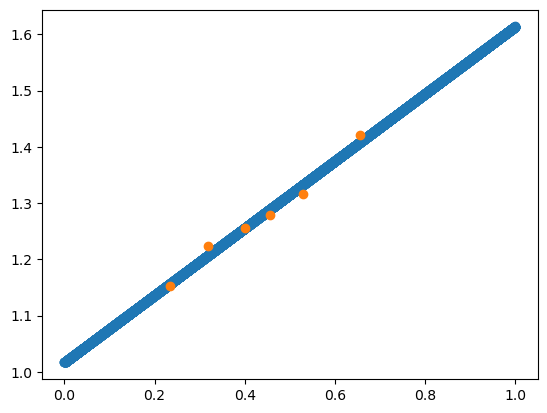

c1 = [1.6739186], c2 = [1.70153462]


In [87]:

model = LinearRegression().fit(plt_mean.reshape(-1, 1), plt_std)
icp, scp = model.intercept_, model.coef_
print(icp, scp)

plt.figure(0)
x = np.arange(0, 1, 0.0001)
plt.scatter(x, x * scp + icp)
plt.scatter(plt_mean, plt_std)
plt.show()

print("c1 = {}, c2 = {}".format(1 / scp, icp / scp))